In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import re
import nltk
import scipy
import scipy.sparse as sparse

from nltk.corpus import stopwords
from numpy import asarray, zeros
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint


import warnings
warnings.filterwarnings('ignore')

In [64]:
data = pd.read_csv("toxicity_parsed_dataset.csv")

In [65]:
data.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.9,0.1,0
1,1,` :Clarification for you (and Zundark's righ...,1.0,0.0,0
2,2,Elected or Electoral? JHK,1.0,0.0,0
3,3,`This is such a fun entry. Devotchka I once...,1.0,0.0,0
4,4,Please relate the ozone hole to increases in c...,0.8,0.2,0


In [66]:
text = data['Text'].to_numpy()
labels = data[['oh_label']].to_numpy()

# Creating the dataframe

In [67]:
dataframe = []
for index in range(len(labels)):
    num = np.count_nonzero(labels[index])
    if(num == 0):
        dataframe.append([text[index], 0])
    else:
        dataframe.append([text[index], 1])

In [68]:
df = pd.DataFrame(dataframe, columns = ['text', 'label'])

In [69]:
df1=df.copy()

In [221]:
df

,text,label
0,This: :One can make an analogy in mathematical...,0
1,` :Clarification for you (and Zundark's righ...,0
2,Elected or Electoral? JHK,0
3,`This is such a fun entry. Devotchka I once...,0
4,Please relate the ozone hole to increases in c...,0
...,...,...
159681,` These sources don't exactly exude a sense ...,0
159682,The Institute for Historical Review is a pee...,0
159683,:The way you're trying to describe it in this...,0
159684,== Warning == There is clearly a protection...,0


In [70]:
df.head()

,text,label
0,This: :One can make an analogy in mathematical...,0
1,` :Clarification for you (and Zundark's righ...,0
2,Elected or Electoral? JHK,0
3,`This is such a fun entry. Devotchka I once...,0
4,Please relate the ozone hole to increases in c...,0


In [71]:
df.tail()

,text,label
159681,` These sources don't exactly exude a sense ...,0
159682,The Institute for Historical Review is a pee...,0
159683,:The way you're trying to describe it in this...,0
159684,== Warning == There is clearly a protection...,0
159685,Alternate option=== Is there perhaps enough ne...,0


In [72]:
df.label.value_counts()

0    144324
1     15362
Name: label, dtype: int64

# Checking imbalancing

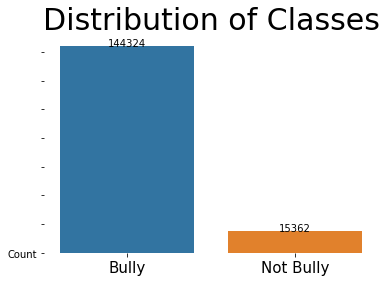

In [12]:
ax = plt.subplot()

g = sns.countplot(df.label)
g.set_xticklabels(['Bully', 'Not Bully'])
g.set_yticklabels(['Count'])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Classes', fontsize=30)
plt.tick_params(axis = 'x', which='major', labelsize=15)
plt.show()

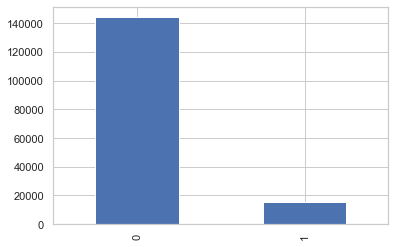

In [73]:
df.label.value_counts().plot(kind="bar")
plt.show()

In [14]:
df['label'].value_counts()

0    144324
1     15362
Name: label, dtype: int64

Considerable imbalance {0 : 143729, 1 : 15842}

Now lets check the performance of provided data without training the model

In [74]:
#import necessary library
import re
from nltk.corpus import stopwords

# here we are removing the stop words from the given text
set_stopwords = set(stopwords.words("english"))

# we further use regex functions to further map them into the function and remove the desired unncessary words
def clean_txt(text): # define the fuction with tokenization/string cleaning for all datasets 
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = re.sub(r'\[[^]]*\]'," ", text) 
    text = re.sub(r"\'s", "", text) 
    text = re.sub(r"\'t", "", text ) 
    text = re.sub(r"\'re", "",text) 
    text = re.sub(r"\'d", "", text) 
    text = re.sub(r"\'ll", " ",text) 
    text = re.sub(r",", " ", text) 
    text = re.sub(r"\(", " ", text) 
    text = re.sub(r"\)", " ", text) 
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text


In [75]:
df1['text'] = df1['text'].apply(clean_txt)

In [76]:
df1

,text,label
0,one make analogy mathematical terms envisionin...,0
1,clarification zundark right checked wikipedia ...,0
2,elected electoral? jhk,0
3,fun entry devotchka coworker korea tell differ...,0
4,please relate ozone hole increases cancer prov...,0
...,...,...
159681,sources exactly exude sense impartiality newsw...,0
159682,institute historical review peer reviewed jour...,0
159683,way trying describe article serious step where...,0
159684,warning clearly protectionist regime going wit...,0


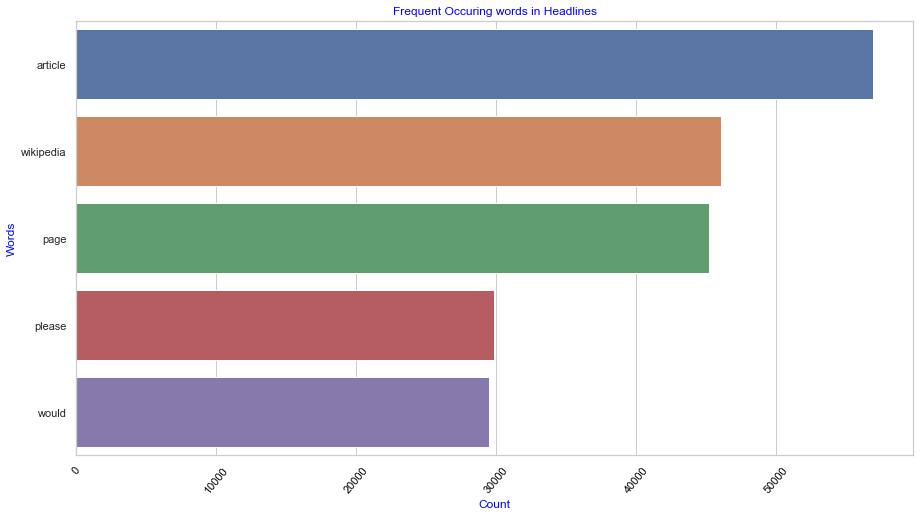

In [209]:
from collections import Counter #import Counter for finding most common words
import seaborn as sns #import searbon for vizualization result

text = df1['text']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0) #converting to Dataframe and drop the Nones values
#result_df
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 8)) 
sns.barplot(y=result_df[0][0:5], x=result_df[1][0:5], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring words in Headlines", color="blue") 
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

In [19]:
bully_words = pd.DataFrame(df1[df1['label']==1]['text'].str.split(expand=True).unstack().value_counts()).reset_index()

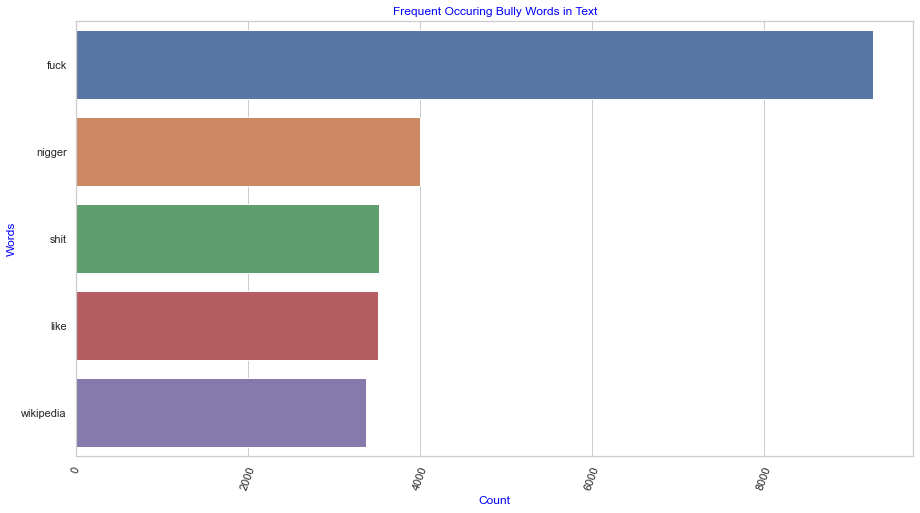

In [210]:
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 8)) 
sns.barplot(y=bully_words['index'][0:5], x=bully_words[0][0:5], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Bully Words in Text", color="blue") 
plt.xticks(rotation=70);
plt.show()

In [25]:
nonbully_words = pd.DataFrame(df1[df1['label']==0]['text'].str.split(expand=True).unstack().value_counts()).reset_index()

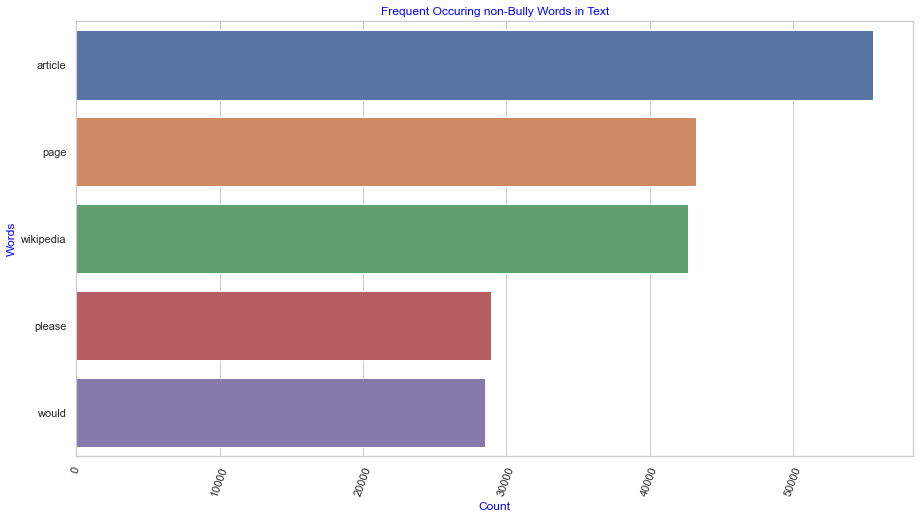

In [211]:
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 8)) 
sns.barplot(y=nonbully_words['index'][0:5], x=nonbully_words[0][0:5], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring non-Bully Words in Text", color="blue") 
plt.xticks(rotation=70);
plt.show()

# Performance of data

For finding accuracy we need to perform- 
1. Data cleaning
2. Vectorization
3. Train test split

## Data cleaning

In [77]:
filter = df["text"] != ""
df_clean = df[filter]
df_clean = df_clean.dropna()

In [78]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [79]:
X = []
sentences = list(df["text"])
for sen in sentences:
    X.append(preprocess_text(sen))

In [80]:
my_stopwords = stopwords.words('english')

## Vectorization

In [81]:
vectorizer = TfidfVectorizer(stop_words = my_stopwords, use_idf = True)
bag_of_words = vectorizer.fit_transform(X)

## Train Test split

In [82]:
x = bag_of_words
y = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 27)

## Performance of data

In [37]:
# dummy classifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)
dummy_predict = dummy.predict(X_test)

print('Test score:', accuracy_score(Y_test, dummy_predict))
print('Test precision score:', precision_score(Y_test, dummy_predict))
print('Test recall score:', precision_score(Y_test, dummy_predict))
print('Test f1 score:', f1_score(Y_test, dummy_predict))

Test score: 0.9012073543409649
Test precision score: 0.0
Test recall score: 0.0
Test f1 score: 0.0


Without training the model we have an accuracy of 0.8986. 

Now lets train some models namely - 
1. Decision Tree
2. Logistic Regression
3. K Nearest Neighbor Classifier

# Algorithm1 - Decision Tree

In [134]:
clf = DecisionTreeClassifier(max_depth = 25)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=25)

In [135]:
dt_predict = clf.predict(X_test)

## Confusion Matrix

In [136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[35640   338]
 [ 1820  2124]]


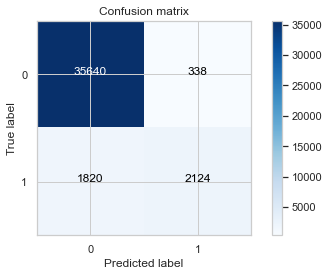

In [137]:
dt_cm = confusion_matrix(Y_test, dt_predict)
plot_confusion_matrix(dt_cm, [0, 1])

## Performance Measure

In [178]:
acdt1 = accuracy_score(Y_test, dt_predict)
print('Accuracy score:', acdt1)
print('Precision:', precision_score(Y_test, dt_predict))
print('Recall:', recall_score(Y_test, dt_predict))
f1dt1 = f1_score(Y_test, dt_predict)
print('F1 score:',f1dt1)

Accuracy score: 0.9459445919543109
Precision: 0.8627132412672623
Recall: 0.5385395537525355
F1 score: 0.6631283172026224


**Observations**:
* Accuraccy increases
* Precision can be improved
* Recall score is not that good
* F1 score needs improvement

A possible solution can be training another model.

Before training another model I will apply ensemble training method - Random Forest

### Random Forest

In [181]:
rf_clf = RandomForestClassifier(25)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=25)

In [182]:
rf_predict = rf_clf.predict(X_test)

#### Confusion Matrix

Confusion matrix, without normalization
[[35733   245]
 [ 1687  2257]]


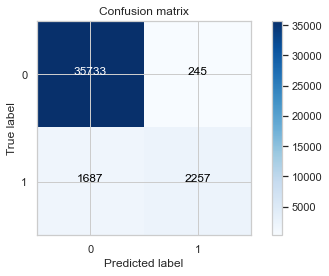

In [183]:
rf_cm = confusion_matrix(Y_test, rf_predict)
plot_confusion_matrix(rf_cm, [0, 1])
plt.show()

#### Performance Measures

In [184]:
acrf1 = accuracy_score(Y_test, rf_predict)
print('Accuracy:',acrf1)
print('Prercision:', precision_score(Y_test, rf_predict))
print('Recall:', recall_score(Y_test, rf_predict))
f1rf1 = f1_score(Y_test, rf_predict)
print('F1 Score:', f1rf1)

Accuracy: 0.9516056309804118
Prercision: 0.9020783373301359
Recall: 0.572261663286004
F1 Score: 0.7002792429413589


**Observations**:

* Accuracy increases
* Precision increases 
* Recall decreases 
* F1 score increases

## Algorithm2 - Logistic regression

In [188]:
lr = LogisticRegression(max_iter = 1000, solver = 'liblinear')
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [189]:
y_predict = lr.predict(X_test)

### Confusion Matrix

Confusion matrix, without normalization
[[35809   169]
 [ 1675  2269]]


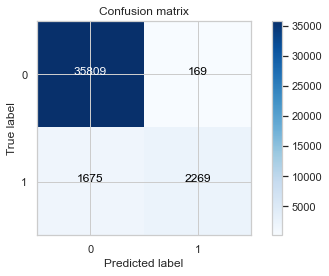

In [190]:
logistic_regression_cm = confusion_matrix(Y_test, y_predict)
plot_confusion_matrix(logistic_regression_cm, [0, 1])
plt.show()

### Performance Measure

In [191]:
aclr1 = accuracy_score(Y_test, y_predict)
print('Accuracy:', aclr1)
print('Precision:', precision_score(Y_test, y_predict))
print('Recall:', recall_score(Y_test, y_predict))
f1lr1 = f1_score(Y_test, y_predict)
print('F1 score:', f1lr1)

Accuracy: 0.9538099293622564
Precision: 0.9306808859721083
Recall: 0.5753042596348884
F1 score: 0.711062362895644


**Observations**:

* Accuracy is greater than Random Forest
* Precision is lower than Random forest
* Recall improves greater than Decision Tree
* F1 score is also greater than Random Forest


In [199]:
summry1 = pd.DataFrame(columns=["Model Name", "Accuracy Score", "F1 Score"])
e1 = {"Model Name": "Decicion Tree", "Accuracy Score":acdt1, "F1 Score":f1dt1}
e2 = {"Model Name": "Random Forest", "Accuracy Score":acrf1, "F1 Score":f1rf1}
e3 = {"Model Name": "Logistic Regression", "Accuracy Score":aclr1, "F1 Score":f1lr1}

summry1 = summry1.append(e1,ignore_index=True)
summry1 = summry1.append(e2,ignore_index=True)
summry1 = summry1.append(e3,ignore_index=True)
print("Basic Models:")
display(summry1)

Basic Models:


,Model Name,Accuracy Score,F1 Score
0,Decicion Tree,0.945945,0.663128
1,Random Forest,0.951606,0.700279
2,Logistic Regression,0.953810,0.711062


**Observations**:
* Accuracy lower than Logistic Regression
* Precision lower than Random Forest
* Recall is not upto the mark
* F1 score is terrible

**Conclusion of algorithms**:
1. Most Accurate - Logistic Regression
2. Most Precise - Random Forest
3. Best Recall - Logistic Regression
4. Best F1 score - Logistic Regression

It can be concluded that **Logistic Regression** is thus far the best algorithm

# Resampling Data

## Oversampling minority class

In [96]:
count_not_bully, count_bully = df.label.value_counts()

not_bully = df[df['label'] == 0]
bully = df[df['label'] == 1]

In [109]:
not_bully

,text,label
0,This: :One can make an analogy in mathematical...,0
1,` :Clarification for you (and Zundark's righ...,0
2,Elected or Electoral? JHK,0
3,`This is such a fun entry. Devotchka I once...,0
4,Please relate the ozone hole to increases in c...,0
...,...,...
159681,` These sources don't exactly exude a sense ...,0
159682,The Institute for Historical Review is a pee...,0
159683,:The way you're trying to describe it in this...,0
159684,== Warning == There is clearly a protection...,0


In [110]:
bully

,text,label
82,"` After the wasted bit on his sexuality, I ha...",1
211,"Erik, for crying out loud. You legally can...",1
245,"BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOB...",1
334,```Nazi filth`` is impolite `,1
483,"Prior to Quickpolls, he would have been perma...",1
...,...,...
159644,im soory since when is google images not allow...,1
159645,what ever you fuggin fag Question how did you ...,1
159646,== Nice try but no cigar........idiot == Th...,1
159647,` == kys == {| style=``background-color: #fd...,1


In [111]:
bully_over = bully.sample(count_not_bully, replace = True)

In [112]:
bully_over

,text,label
102717,== reverting my edits == stop it you asscak...,1
126836,== cretinism == people who pay £400 a quart...,1
140499,::Another self-appointed moderator. All Vict...,1
91513,"` ::VirtualSteve, you are making personal atta...",1
38687,Stop accusing me of vandalism (WANKER) Gwerno...,1
...,...,...
41634,why are my comments being removed? this is M...,1
149227,Dare send messages like this. You are the ca...,1
32789,Fuck the Killers and Fuck you too.,1
138088,` == This is why Wikipedia is a joke and can ...,1


In [113]:
test_over = pd.concat([not_bully, bully_over], axis = 0)
#print(test_over.label.value_counts())

In [115]:
test_over.shape

(288648, 2)

Resampled data equally

In [98]:
test_over.head()

,text,label
0,This: :One can make an analogy in mathematical...,0
1,` :Clarification for you (and Zundark's righ...,0
2,Elected or Electoral? JHK,0
3,`This is such a fun entry. Devotchka I once...,0
4,Please relate the ozone hole to increases in c...,0


In [99]:
test_over.tail()

,text,label
86892,::::Tell that to the editors she drove off wi...,1
82853,If I wanted a kiss I'd call your mother,1
36901,"stop catching feelings Durova, you dyke! You ...",1
74890,"Fuck you, unpopular opinion, you disgusting ...",1
64303,Unacceptable? That I editted a nonsense sent...,1


Now performing the following operations on resampled data:
1. Data Cleaning
2. Vectorization
3. Train Test split

# Data Cleaning

In [100]:
new_filter = test_over["text"] != ""
test_over = test_over[new_filter]
test_over = test_over.dropna()

In [116]:
def preprocessing_text(sen):
    # Remove punctuations and numbers
    sent = re.sub('[^a-zA-Z]', ' ', sen)
    # Single character removal
    sent = re.sub(r"\s+[a-zA-Z]\s+", ' ', sent)
    # Removing multiple spaces
    sent = re.sub(r'\s+', ' ', sent)
    return sent

In [117]:
X_new = []
new_sentences = list(test_over["text"])
for sents in new_sentences:
    X_new.append(preprocessing_text(sents))

# Vectorization

In [120]:
my_stopwords = stopwords.words('english')

vectorizer = TfidfVectorizer(stop_words = my_stopwords, use_idf = True)
bag_of_words = vectorizer.fit_transform(X_new)

# Train Test split

In [121]:
x = bag_of_words
y = test_over['label']

In [122]:
x.shape

(288648, 166830)

In [123]:
y.shape

(288648,)

In [124]:
X_train_old, X_test_old, Y_train_old, Y_test_old = train_test_split(x, y, test_size = 0.20, random_state = 123)

# Performance of new data

In [125]:
dummy_new = DummyClassifier(strategy='most_frequent').fit(X_train_old, Y_train_old)
dummy_predict_new = dummy_new.predict(X_test_old)

print('Test score:', accuracy_score(Y_test_old, dummy_predict_new))
print('Test precision score:', precision_score(Y_test_old, dummy_predict_new))
print('Test recall score:', precision_score(Y_test_old, dummy_predict_new))
print('Test f1 score:', f1_score(Y_test_old, dummy_predict_new))

Test score: 0.49922050926727873
Test precision score: 0.49922050926727873
Test recall score: 0.49922050926727873
Test f1 score: 0.6659734257654535


**Observations**:

Accuracy of resampled data is less than imbalanced data.

Precision, recall and f1 score have increased.

Now lets apply the algorithms

# Algorithm1 - Decision Tree

In [128]:
dt_clf_resampled = DecisionTreeClassifier(max_depth = 25)
dt_clf_resampled.fit(X_train_old, Y_train_old)

DecisionTreeClassifier(max_depth=25)

In [129]:
dt_predict_resampled = dt_clf_resampled.predict(X_test_old)

## Confusion Matrix

Confusion matrix, without normalization
[[28115   795]
 [11042 17778]]


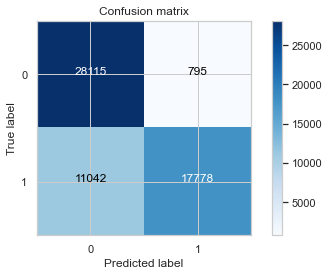

In [138]:
dt_cm_resampled = confusion_matrix(Y_test_old, dt_predict_resampled)
plot_confusion_matrix(dt_cm_resampled, [0, 1])
plt.show()

## Performance Measure

In [201]:
acdt2 = accuracy_score(Y_test_old, dt_predict_resampled)
print('Accuracy Score:',acdt2)
print('Precision:', precision_score(Y_test_old, dt_predict_resampled))
print('Recall:',recall_score(Y_test_old, dt_predict_resampled))
f1dt2 = f1_score(Y_test_old, dt_predict_resampled)
print('F1 Score:', f1dt2)

Accuracy Score: 0.7949592932617356
Precision: 0.9571959295751898
Recall: 0.6168632893823733
F1 Score: 0.7502373768278014


**Observations**:
* Accuracy: Has improved but can be improved
* Precision: Very good. Improved drastically
* Recall: Better than last time can be improved further
* f1 score: Improved.

Now applying ensemble techniques on Decision Tree.

## Random Forest

In [140]:
rf_clf_resampled = RandomForestClassifier(25)
rf_clf_resampled.fit(X_train_old, Y_train_old)

RandomForestClassifier(n_estimators=25)

In [141]:
rf_predict_resampled = rf_clf_resampled.predict(X_test_old)

### Confusion Matrix

Confusion matrix, without normalization
[[28584   326]
 [   25 28795]]


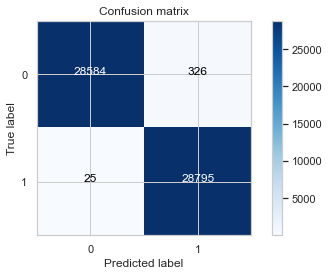

In [142]:
rf_cm_resampled = confusion_matrix(Y_test_old, rf_predict_resampled)
plot_confusion_matrix(rf_cm_resampled, [0, 1])
plt.show()

### Performance Measure

In [202]:
acrf2 = accuracy_score(Y_test_old, rf_predict_resampled)
print('Accuracy Score:', acrf2)
print('Precision:', precision_score(Y_test_old, rf_predict_resampled))
print('Recall:',recall_score(Y_test_old, rf_predict_resampled))
f1rf2 = f1_score(Y_test_old, rf_predict_resampled)
print('F1 Score:', f1rf2)

Accuracy Score: 0.8988047808764941
Precision: 0.9483687168279737
Recall: 0.8431991672449688
F1 Score: 0.8926970832414959


**Observations**:
Accuracy , Precision , Recall score and F1 Score are very high

# Algorithm2 - Logistic Regression

In [146]:
lr_resampled = LogisticRegression(max_iter=1000, penalty="l2", solver = 'liblinear')
lr_resampled.fit(X_train_old, Y_train_old)

LogisticRegression(max_iter=1000, solver='liblinear')

In [147]:
y_predict_resampled = lr_resampled.predict(X_test_old)

## Confusion matrix

Confusion matrix, without normalization
[[27622  1288]
 [  995 27825]]


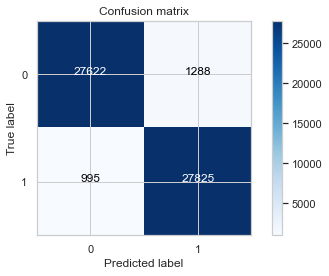

In [148]:
logistic_regression_cm_resampled = confusion_matrix(Y_test_old, y_predict_resampled)
plot_confusion_matrix(logistic_regression_cm_resampled, [0, 1])
plt.show()

## Performance Measure

In [203]:
aclr2 = accuracy_score(Y_test_old, y_predict_resampled)
print('Accuracy Score:', aclr2)
print('Precision:', precision_score(Y_test_old, y_predict_resampled))
print('Recall:',recall_score(Y_test_old, y_predict_resampled))
f1lr2 = f1_score(Y_test_old, y_predict_resampled)
print('F1 Score:',f1lr2)

Accuracy Score: 0.9604538368266066
Precision: 0.955758595816302
Recall: 0.9654753643303262
F1 Score: 0.9605924084718555


## build the lightgbm model

In [150]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_old, Y_train_old)

LGBMClassifier()

In [152]:
clf_predict_resampled = clf.predict(X_test_old)

Confusion matrix, without normalization
[[27587  1323]
 [ 4519 24301]]


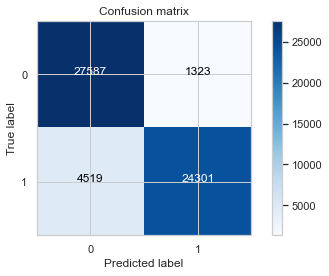

In [154]:
clf_cm_resampled = confusion_matrix(Y_test_old, clf_predict_resampled)
plot_confusion_matrix(clf_cm_resampled, [0, 1])
plt.show()

In [204]:
aclgb = accuracy_score(Y_test_old, clf_predict_resampled)
print('Accuracy Score:', aclgb)
print('Precision:', precision_score(Y_test_old, clf_predict_resampled))
print('Recall:',recall_score(Y_test_old, clf_predict_resampled))
f1lgb = f1_score(Y_test_old, clf_predict_resampled)
print('F1 Score:', f1lgb)

Accuracy Score: 0.8988047808764941
Precision: 0.9483687168279737
Recall: 0.8431991672449688
F1 Score: 0.8926970832414959


**Conclusion**:
1. Most accurate algorithm: Random Forest
2. Most precise algorithm: Random Forest
3. Best recall score: Random Forest
4. Best f1 score: Random Forest

**Random Forest** emerges as the best evaluation technique

Area under ROC curve for ideal classifier is 1. There is considerable evidence that after resampling **Random Forest** is the best classfier.

In [207]:
summry2 = pd.DataFrame(columns=["Model Name", "Accuracy Score", "F1 Score"])
e1 = {"Model Name": "Decicion Tree", "Accuracy Score":acdt2, "F1 Score":f1dt2}
e2 = {"Model Name": "Random Forest", "Accuracy Score":acrf2, "F1 Score":f1rf2}
e3 = {"Model Name": "Logistic Regression", "Accuracy Score":aclr2, "F1 Score":f1lr2}
e4 = {"Model Name": "Light GBM", "Accuracy Score":aclgb, "F1 Score":f1lgb}

summry2 = summry2.append(e1,ignore_index=True)
summry2 = summry2.append(e2,ignore_index=True)
summry2 = summry2.append(e3,ignore_index=True)
summry2 = summry2.append(e4,ignore_index=True)
print("Tuned Model:")
display(summry2)

Tuned Model:


,Model Name,Accuracy Score,F1 Score
0,Decicion Tree,0.794959,0.750237
1,Random Forest,0.898805,0.892697
2,Logistic Regression,0.960454,0.960592
3,Light GBM,0.898805,0.892697


## Hyper-parameter Tuning

Thus far I have fit the model parameters by training a model with existing data. However, there are some parameters that cannot be directly learnt from the regular training process known as Hyperparameters.

Hyperparameters express important properties such as complexity and how fast the algorithm should learn 


### Grid Search

#### Applying Grid Search on Logistic Regression

In [170]:
# x = bag_of_words_new
# y = test_over['label']
# # X_train_old, X_test_old, Y_train_old, Y_test_old = train_test_split(x, y, test_size = 0.25, random_state = 27)
# X_train, X_test , y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 123)

In [171]:
# # Grid search cross validation
# X_train, X_test , y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 123)

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
# logreg=LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=10)
# logreg_cv.fit(X_train,y_train)

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [173]:
# tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
# accuracy : 0.981175132456112

# Training with best parameters:
lr_hp = LogisticRegression(max_iter=1000, penalty="l2", solver = 'liblinear')
lr_hp.fit(X_train_old, Y_train_old)

LogisticRegression(max_iter=1000, solver='liblinear')

In [174]:
y_hp = lr_hp.predict(X_test_old)

In [175]:
print('Accuracy Score:', accuracy_score(Y_test_old, y_hp))
print('Precision:', precision_score(Y_test_old, y_hp))
print('Recall:',recall_score(Y_test_old, y_hp))
print('F1 Score:', f1_score(Y_test_old, y_hp))

Accuracy Score: 0.9604538368266066
Precision: 0.955758595816302
Recall: 0.9654753643303262
F1 Score: 0.9605924084718555


In [208]:
# Training with best parameters:
lr_hp = LogisticRegression(max_iter=1000, penalty="l2", solver = 'liblinear')
lr_hp.fit(X_train_old, Y_train_old)
y_hp = lr_hp.predict(X_test_old)
print('Accuracy Score:', accuracy_score(Y_test_old, y_hp))
print('F1 Score:', f1_score(Y_test_old, y_hp))

Accuracy Score: 0.9604538368266066
F1 Score: 0.9605924084718555


### Randomized Search

#### Applying Randomized Search on Decision Tree

In [79]:
# Grid Search CV ~ Random Forest:
X_train, X_test , y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 123)

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

KeyboardInterrupt: 

In [ ]:
# Fitting Best Parameters:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
ac_rfcv = accuracy_score(y_test,pred)
print("Accuracy for Random Forest on CV data: ",round(ac_rfcv*100, 2))

Work in progress...

<hr>

# PROTO TYPE

### Sample Prediction:

In [396]:
user = pd.DataFrame()
t1 = {"text":str(input("Enter the text:"))}
user = user.append(t1, ignore_index=True)
# t2 = {"text":str(input("Enter the text:"))}
# user = user.append(t2, ignore_index=True)
display(user)

Enter the text:you are a moron


,text
0,you are a moron


In [397]:
test_over = test_over.append(t1, ignore_index = True)

In [398]:
#test_over.iloc[-1]

In [399]:
# new_filter = test_over["text"] != ""
# test_over = test_over[new_filter]
# test_over = test_over.dropna()

X_new = []
new_sentences = list(test_over["text"])
for sents in new_sentences:
    X_new.append(preprocessing_text(sents))

my_stopwords = stopwords.words('english')

vectorizer = TfidfVectorizer(stop_words = my_stopwords, use_idf = True)
bag_of_words = vectorizer.fit_transform(X_new)

In [402]:
u_data = bag_of_words[-1]
u_data

<1x166830 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [403]:
OP=lr_hp.predict(u_data)
print("You are bullying") if OP==1 else print("You are not bullying")

You are bullying


In [400]:
#(test_over.text.apply(preprocessing_text))

In [401]:
#bag_of_words

In [377]:
OP=rf_clf.predict(u_data)
print("You are bullying") if OP==1 else print("You are not bullying")

array([0], dtype=int64)

In [378]:
OP=lr.predict(u_data)
print("You are bullying") if OP==1 else print("You are not bullying")